In [2]:
note_seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [3]:
note_seq[0:5], note_seq[1:6], note_seq[2:7]

(['g8', 'e8', 'e4', 'f8', 'd8'],
 ['e8', 'e4', 'f8', 'd8', 'd4'],
 ['e4', 'f8', 'd8', 'd4', 'c8'])

In [4]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

In [5]:
len(note_seq), range(len(note_seq)-5)

(54, range(0, 49))

In [6]:
code2idx['g8']

11

In [7]:
dataset = list()
for i in range(len(note_seq)-5):
  subset = note_seq[i:i+5]
  items = list()
  # print(subset)
  for item in subset:
    # print(code2idx[item])
    items.append(code2idx[item])
  # print(items)
  dataset.append(items)

print(dataset)

[[11, 9, 2, 10, 8], [9, 2, 10, 8, 1], [2, 10, 8, 1, 7], [10, 8, 1, 7, 8], [8, 1, 7, 8, 9], [1, 7, 8, 9, 10], [7, 8, 9, 10, 11], [8, 9, 10, 11, 11], [9, 10, 11, 11, 4], [10, 11, 11, 4, 11], [11, 11, 4, 11, 9], [11, 4, 11, 9, 9], [4, 11, 9, 9, 9], [11, 9, 9, 9, 10], [9, 9, 9, 10, 8], [9, 9, 10, 8, 1], [9, 10, 8, 1, 7], [10, 8, 1, 7, 9], [8, 1, 7, 9, 11], [1, 7, 9, 11, 11], [7, 9, 11, 11, 9], [9, 11, 11, 9, 9], [11, 11, 9, 9, 2], [11, 9, 9, 2, 8], [9, 9, 2, 8, 8], [9, 2, 8, 8, 8], [2, 8, 8, 8, 8], [8, 8, 8, 8, 8], [8, 8, 8, 8, 9], [8, 8, 8, 9, 3], [8, 8, 9, 3, 9], [8, 9, 3, 9, 9], [9, 3, 9, 9, 9], [3, 9, 9, 9, 9], [9, 9, 9, 9, 9], [9, 9, 9, 9, 10], [9, 9, 9, 10, 4], [9, 9, 10, 4, 11], [9, 10, 4, 11, 9], [10, 4, 11, 9, 2], [4, 11, 9, 2, 10], [11, 9, 2, 10, 8], [9, 2, 10, 8, 1], [2, 10, 8, 1, 7], [10, 8, 1, 7, 9], [8, 1, 7, 9, 11], [1, 7, 9, 11, 11], [7, 9, 11, 11, 9], [9, 11, 11, 9, 9]]


In [8]:
import numpy as np
datasets = np.array(dataset)

In [9]:
x_train = datasets[:,0:4]
x_train.shape, #x_train

((49, 4),)

In [10]:
y_train = datasets[:,4]
y_train.shape, #y_train

((49,),)

In [11]:
len(code2idx)

14

In [13]:
x_train = x_train / 14 # len(code2idx)
x_train[4]

array([0.04733728, 0.00591716, 0.04142012, 0.04733728])

# make model

In [14]:
import tensorflow as tf

In [15]:
x_train.shape, x_train[4]     # --> scale

((49, 4), array([0.04733728, 0.00591716, 0.04142012, 0.04733728]))

In [16]:
X_train = np.reshape(x_train, (49, 4, 1))     # tensor
X_train.shape, X_train[2]

((49, 4, 1), array([[0.01183432],
        [0.0591716 ],
        [0.04733728],
        [0.00591716]]))

In [17]:
np.unique(y_train)

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11])

In [18]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(4,1))) # input layer
model.add(tf.keras.layers.LSTM(128)) # hidden layer
model.add(tf.keras.layers.Dense(14, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # gadget

In [19]:
hist = model.fit(X_train, y_train, epochs=1500, batch_size=10) # 50 / 5 = 10

Epoch 1/1500
5/5 [==============================] - 2s 7ms/step - loss: 2.6337 - accuracy: 0.1837
Epoch 2/1500
5/5 [==============================] - 0s 7ms/step - loss: 2.6124 - accuracy: 0.3469
Epoch 3/1500
5/5 [==============================] - 0s 7ms/step - loss: 2.5836 - accuracy: 0.3469
Epoch 4/1500
5/5 [==============================] - 0s 7ms/step - loss: 2.5422 - accuracy: 0.3469
Epoch 5/1500
5/5 [==============================] - 0s 7ms/step - loss: 2.4732 - accuracy: 0.3469
Epoch 6/1500
5/5 [==============================] - 0s 7ms/step - loss: 2.3631 - accuracy: 0.3469
Epoch 7/1500
5/5 [==============================] - 0s 8ms/step - loss: 2.1995 - accuracy: 0.3469
Epoch 8/1500
5/5 [==============================] - 0s 7ms/step - loss: 2.0094 - accuracy: 0.3469
Epoch 9/1500
5/5 [==============================] - 0s 7ms/step - loss: 2.0070 - accuracy: 0.3469
Epoch 10/1500
5/5 [==============================] - 0s 7ms/step - loss: 1.9690 - accuracy: 0.3469
Epoch 11/1500
5/5 [

# Evaluate

In [20]:
model.evaluate(X_train, y_train)

2/2 [==============================] - 1s 10ms/step - loss: 1.0679 - accuracy: 0.5714


[1.0678937435150146, 0.5714285969734192]

In [21]:
X_train[4:5]

array([[[0.04733728],
        [0.00591716],
        [0.04142012],
        [0.04733728]]])

In [22]:
model.predict(X_train[4:5])

array([[1.3108418e-09, 7.6547236e-04, 6.6104479e-07, 1.9215667e-03,
        5.0637805e-06, 4.1847986e-10, 1.7412001e-09, 1.3120695e-04,
        5.3604082e-03, 3.1933427e-01, 5.5976617e-03, 6.6688371e-01,
        5.0698296e-10, 8.7631224e-10]], dtype=float32)

In [23]:
first = 0.04733728
second = 0.00591716
third = 0.04142012
fourth = 0.04733728

In [24]:
# [[[0.04733728], [0.00591716], [0.04142012], [0.04733728]]]
# pred = model.predict([[[first], [second], [third], [fourth]]])
pred = model.predict(X_train[0:1])

In [25]:
np.argmax(pred)

8

In [26]:
# note_seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
#        'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
#        'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
#        'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [27]:
# code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
#             'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

In [28]:
import matplotlib.pyplot as plt

In [29]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

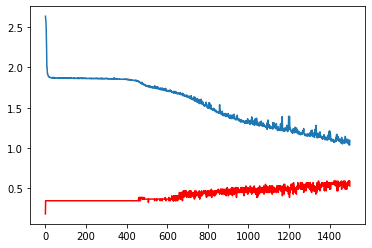

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'], 'r-')
plt.show()